In [100]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager, rc
import platform
sns.set(style='darkgrid')

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')
rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus'] = False
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [115]:
df_money = pd.read_csv('./실습데이터/환율_종합.csv', parse_dates=['일자'], encoding='cp949')
df_chn = pd.read_csv('./실습데이터/환율/원위안.csv', parse_dates=['Date'], encoding='utf8')

In [103]:
#달러 위안 엔화 유로중 가장 달러에 영향을 끼치는 데이터 상관분석

In [104]:
df_money = df_money[['일자', '달러', '엔화', '유로']]

In [118]:
df_chn = df_chn[['Date', 'Close']]

In [119]:
df_chn

,Date,Close
0,2003-12-01,0.688690
1,2003-12-02,0.691030
2,2003-12-03,0.690800
3,2003-12-04,0.693310
4,2003-12-05,0.694770
...,...,...
4410,2020-10-26,0.005918
4411,2020-10-27,0.005919
4412,2020-10-28,0.005929
4413,2020-10-29,0.005920


In [122]:
df_chn = df_chn.set_index('Date')

In [125]:
df_money = df_money[:-4]

In [127]:
df_money = df_money.set_index('일자')

In [129]:
df_money = df_money.join(df_chn)

In [130]:
df_money

,달러,위안,엔화,유로,Close
일자,,,,,
1970-01-05,304,NaN,NaN,NaN,NaN
1970-01-06,304,NaN,NaN,NaN,NaN
1970-01-07,304,NaN,NaN,NaN,NaN
1970-01-08,304,NaN,NaN,NaN,NaN
1970-01-09,304,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2020-10-22,"1,134",171.0,"1,084","1,344",0.005864
2020-10-23,"1,134",170.0,"1,081","1,341",0.005884
2020-10-26,"1,135",170.0,"1,084","1,344",0.005918


In [131]:
df_money = df_money.reset_index()

In [133]:
df_money = pd.read_csv('./실습데이터/환율_종합.csv', parse_dates=['일자'], encoding='cp949')


In [134]:
df_money

,일자,달러,위안,엔화,유로
0,1970-01-05,304,NaN,NaN,NaN
1,1970-01-06,304,NaN,NaN,NaN
2,1970-01-07,304,NaN,NaN,NaN
3,1970-01-08,304,NaN,NaN,NaN
4,1970-01-09,304,NaN,NaN,NaN
...,...,...,...,...,...
14004,2020-10-28,"1,128",168.0,"1,079","1,328"
14005,8.8.1.1 주요국통화의 대원화 환율,NaN,NaN,NaN,NaN
14006,통계담당 : 한국은행 국제국 외환시장팀(02-759-5763),NaN,NaN,NaN,NaN
14007,주 : 1) 서울외국환중개 고시 기준(08:10분대 국제외환시장 시세를 이용하여 산출),NaN,NaN,NaN,NaN


In [135]:
df_new = df_money[:-4]

In [136]:
df_new = df_new.dropna()

In [141]:
df_new

,일자,달러,위안,엔화,유로
12818,2016-01-04,1172,178.0,974,1272
12819,2016-01-05,1184,179.0,992,1282
12820,2016-01-06,1188,179.0,997,1277
12821,2016-01-07,1194,179.0,1008,1287
12822,2016-01-08,1200,179.0,1021,1310
...,...,...,...,...,...
14000,2020-10-22,1134,171.0,1084,1344
14001,2020-10-23,1134,170.0,1081,1341
14002,2020-10-26,1135,170.0,1084,1344
14003,2020-10-27,1129,169.0,1077,1333


In [143]:
df_new['엔화'] = df_new['엔화'].str.replace(',', '')
df_new['달러'] = df_new['달러'].str.replace(',', '')
df_new['유로'] = df_new['유로'].str.replace(',', '')
#df_new['위안'] = df_new['위안'].str.replace(',', '')
df_new['엔화'] = pd.to_numeric(df_new['엔화'])
df_new['달러'] = pd.to_numeric(df_new['달러'])
df_new['유로'] = pd.to_numeric(df_new['유로'])
df_new['위안'] = pd.to_numeric(df_new['위안'])

In [144]:
df_new.corr()

,달러,위안,엔화,유로
달러,1.000000,0.551669,0.756525,0.426214
위안,0.551669,1.000000,0.379916,0.469704
엔화,0.756525,0.379916,1.000000,0.458487
유로,0.426214,0.469704,0.458487,1.000000


<AxesSubplot:>

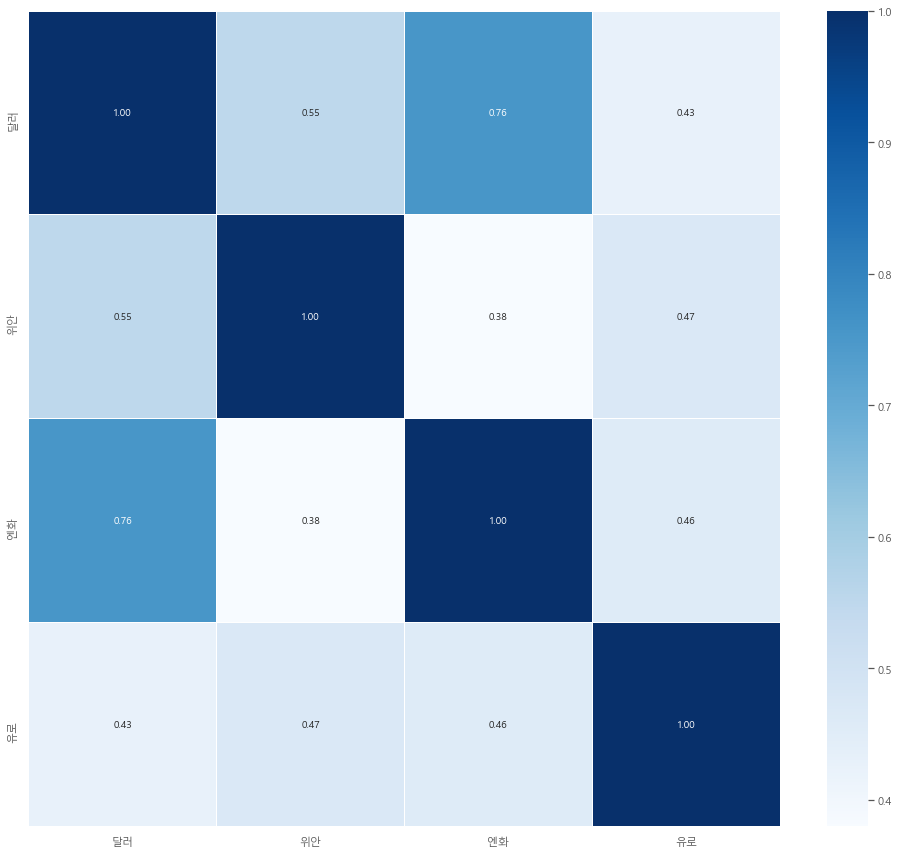

In [145]:
plt.figure(figsize=(15,15))
sns.heatmap(data = df_new.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

In [105]:
df_new = df_money[:-4]

In [106]:
df_new = df_new.dropna()

In [107]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6814 entries, 7191 to 14004
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   일자      6814 non-null   object
 1   달러      6814 non-null   object
 2   엔화      6814 non-null   object
 3   유로      6814 non-null   object
dtypes: object(4)
memory usage: 266.2+ KB


In [108]:
df_new['엔화'] = df_new['엔화'].str.replace(',', '')
df_new['달러'] = df_new['달러'].str.replace(',', '')
df_new['유로'] = df_new['유로'].str.replace(',', '')

In [109]:
df_new['엔화'] = pd.to_numeric(df_new['엔화'])
df_new['달러'] = pd.to_numeric(df_new['달러'])
df_new['유로'] = pd.to_numeric(df_new['유로'])

In [110]:
df_new.corr()

,달러,엔화,유로
달러,1.000000,0.667841,0.637045
엔화,0.667841,1.000000,0.759520
유로,0.637045,0.759520,1.000000


<AxesSubplot:>

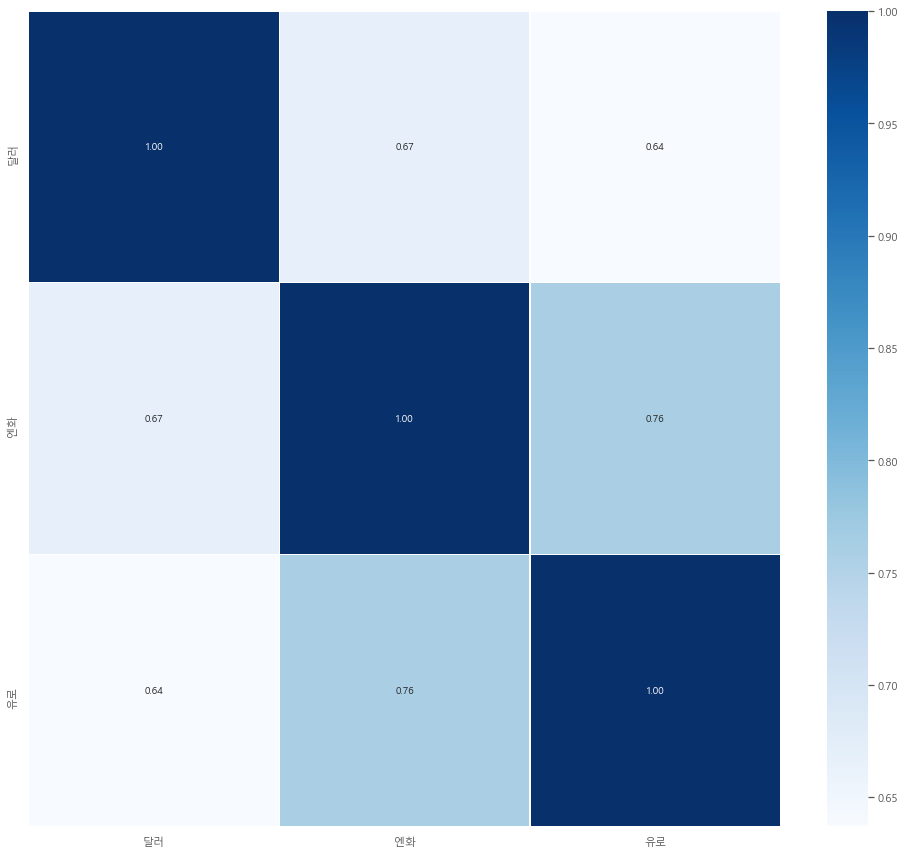

In [111]:
plt.figure(figsize=(15,15))
sns.heatmap(data = df_new.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

In [ ]:
#이제 금, 유가, 나스닥, 다우존슨, S&P와 달러의 corr확인(종가로만)
#데이터프레임 합치기

In [212]:
oil = pd.read_csv('./실습데이터/oil.csv', parse_dates = ['Date'], encoding='cp949')
gold = pd.read_csv('./실습데이터/gold.csv', parse_dates=['Date'], encoding='cp949')
nasdaq = pd.read_csv('./실습데이터/nasdaq.csv', parse_dates=['Date'], encoding='cp949')
dow = pd.read_csv('./실습데이터/dow.csv', parse_dates=['Date'], encoding='cp949')
snp = pd.read_csv('./실습데이터/S&P500.csv', parse_dates=['Date'], encoding='cp949')
dollar = pd.read_csv('./실습데이터/환율_종합.csv', parse_dates=['일자'], encoding='cp949')

In [213]:
#dollar 데이터프레임에 나머지 데이터프레임들 추가해주기 및 날자 정리

In [214]:
dollar = dollar[:-4]

In [215]:
dollar = dollar[['일자','달러']]

In [216]:
oil = oil[['Date', 'Close']]
gold = gold[['Date', 'Close']]
nasdaq = nasdaq[['Date', 'Close']]
dow = dow[['Date', 'Close']]
snp = snp[['Date', 'Close']]

In [217]:
df_dollar = dollar.set_index('일자')

In [218]:
df_oil = oil.set_index('Date')
df_gold = gold.set_index('Date')
df_nasdaq =  nasdaq.set_index('Date')
df_dow = dow.set_index('Date')
df_snp = snp.set_index('Date')

In [219]:
df_oil.rename(columns = {'Close' : 'oil_close'}, inplace = True)

In [220]:
df_gold.rename(columns = {'Close' : 'gold_close'}, inplace = True)
df_nasdaq.rename(columns = {'Close' : 'nasdaq_close'}, inplace = True)
df_dow.rename(columns = {'Close' : 'dow_close'}, inplace = True)
df_snp.rename(columns = {'Close' : 'snp_close'}, inplace = True)

In [221]:
#종가 이름이 전부 똑같아서 바꿔줘야함

In [222]:
df_dollar = df_dollar.join(df_oil)
df_dollar = df_dollar.join(df_gold)
df_dollar = df_dollar.join(df_nasdaq)
df_dollar = df_dollar.join(df_dow)
df_dollar = df_dollar.join(df_snp)

In [223]:
df_dollar

,달러,oil_close,gold_close,nasdaq_close,dow_close,snp_close
일자,,,,,,
1970-01-05,304,NaN,NaN,NaN,NaN,93.459999
1970-01-06,304,NaN,NaN,NaN,NaN,92.820000
1970-01-07,304,NaN,NaN,NaN,NaN,92.629997
1970-01-08,304,NaN,NaN,NaN,NaN,92.680000
1970-01-09,304,NaN,NaN,NaN,NaN,92.400002
...,...,...,...,...,...,...
2020-10-22,"1,134",40.639999,1901.099976,11506.009766,28363.660156,3453.489990
2020-10-23,"1,134",39.849998,1902.000000,11548.280273,28335.570313,3465.389893
2020-10-26,"1,135",38.560001,1902.699951,11358.940430,27685.380859,3400.969971


In [206]:
df_new

,위안,엔화,유로
일자,,,
2016-01-04,178.0,974,1272
2016-01-05,179.0,992,1282
2016-01-06,179.0,997,1277
2016-01-07,179.0,1008,1287
2016-01-08,179.0,1021,1310
...,...,...,...
2020-10-22,171.0,1084,1344
2020-10-23,170.0,1081,1341
2020-10-26,170.0,1084,1344


In [204]:
df_new = df_new.set_index('일자')

KeyError: "None of ['일자'] are in the columns"

In [207]:
df_new

,위안,엔화,유로
일자,,,
2016-01-04,178.0,974,1272
2016-01-05,179.0,992,1282
2016-01-06,179.0,997,1277
2016-01-07,179.0,1008,1287
2016-01-08,179.0,1021,1310
...,...,...,...
2020-10-22,171.0,1084,1344
2020-10-23,170.0,1081,1341
2020-10-26,170.0,1084,1344


In [185]:
df_new = df_new.drop(['달러'], axis=1)

In [186]:
df_new

,위안,엔화,유로
일자,,,
2016-01-04,178.0,974,1272
2016-01-05,179.0,992,1282
2016-01-06,179.0,997,1277
2016-01-07,179.0,1008,1287
2016-01-08,179.0,1021,1310
...,...,...,...
2020-10-22,171.0,1084,1344
2020-10-23,170.0,1081,1341
2020-10-26,170.0,1084,1344


In [208]:
df_dollar = df_dollar.join(df_new)

In [210]:
df_dollar = df.dropna()

In [225]:
df = df_dollar

In [227]:
df = df.join(df_new)

In [229]:
df = df.dropna()

In [233]:
df['달러'] = df['달러'].str.replace(',', '')
df['달러'] = pd.to_numeric(df['달러'])

In [235]:
df.corr()

,달러,oil_close,gold_close,nasdaq_close,dow_close,snp_close,위안,엔화,유로
달러,1.000000,-0.606544,0.437695,0.209531,-0.013769,0.122503,0.550320,0.757018,0.431877
oil_close,-0.606544,1.000000,-0.385731,0.066905,0.409359,0.238236,-0.506258,-0.560968,-0.253806
gold_close,0.437695,-0.385731,1.000000,0.818944,0.538565,0.709752,0.096029,0.675251,0.626008
nasdaq_close,0.209531,0.066905,0.818944,1.000000,0.891552,0.970568,-0.208576,0.324599,0.558388
dow_close,-0.013769,0.409359,0.538565,0.891552,1.000000,0.968538,-0.411925,0.058352,0.376633
snp_close,0.122503,0.238236,0.709752,0.970568,0.968538,1.000000,-0.313557,0.225734,0.469979
위안,0.550320,-0.506258,0.096029,-0.208576,-0.411925,-0.313557,1.000000,0.379523,0.470323
엔화,0.757018,-0.560968,0.675251,0.324599,0.058352,0.225734,0.379523,1.000000,0.461075
유로,0.431877,-0.253806,0.626008,0.558388,0.376633,0.469979,0.470323,0.461075,1.000000


<AxesSubplot:>

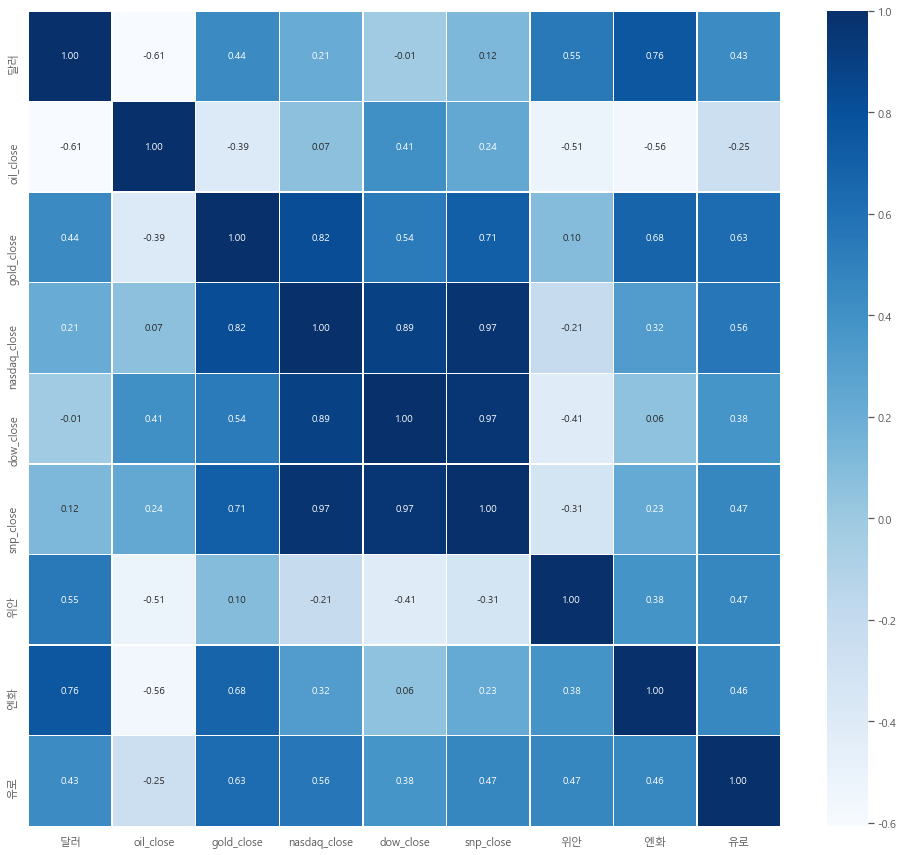

In [236]:
plt.figure(figsize=(15,15))
sns.heatmap(data = df.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

In [238]:
df = df.drop(['nasdaq_close','dow_close','snp_close'], axis=1)

In [240]:
df.rename(columns = {'oil_close' : '유가', 'gold_close':'금'}, inplace = True)

In [242]:
df['유가'] = pd.to_numeric(df['유가'])
df['금'] = pd.to_numeric(df['금'])

In [244]:
df['유가'] = round(df['유가'], -1)
df['금'] = round(df['금'], -1)
df['유가'] = df['유가'].convert_dtypes()
df['금'] = df['금'].convert_dtypes()

In [249]:
df

,달러,유가,금,위안,엔화,유로
일자,,,,,,
2016-01-04,1172,40,1080,178.0,974.0,1272.0
2016-01-05,1184,40,1080,179.0,992.0,1282.0
2016-01-06,1188,30,1090,179.0,997.0,1277.0
2016-01-07,1194,30,1110,179.0,1008.0,1287.0
2016-01-08,1200,30,1100,179.0,1021.0,1310.0
...,...,...,...,...,...,...
2020-10-22,1134,40,1900,171.0,1084.0,1344.0
2020-10-23,1134,40,1900,170.0,1081.0,1341.0
2020-10-26,1135,40,1900,170.0,1084.0,1344.0


In [252]:
train = df[:-400]
test = df[-400:]

In [253]:
#데이터 셋을 만들어주는 함수 20일씩 묶어줌
def make_dataset(data, label, window_size=20):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [254]:
feature_cols = ['위안','엔화', '유로', '유가', '금']
label_cols = ['달러']

train_feature = train[feature_cols]
train_label = train[label_cols]
test_feature = test[feature_cols]
test_label = test[label_cols]

In [255]:
# train dataset
train_feature, train_label = make_dataset(train_feature, train_label, 20)

# train, validation set 생성
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)

x_train.shape, x_valid.shape

((575, 20, 5), (144, 20, 5))

In [256]:
# test dataset (실제 예측 해볼 데이터)
test_feature, test_label = make_dataset(test_feature, test_label, 20)
test_feature.shape, test_label.shape



x_train.shape, x_valid.shape

((575, 20, 5), (144, 20, 5))

In [257]:
model = Sequential()
model.add(LSTM(16, 
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='relu', 
               return_sequences=False)
          )
model.add(Dense(1))

In [258]:
model_path = PATH = 'C:/Users/694/07.27-12.1_CLOUD/머신러닝을 위한 파이썬 문법' 

model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', patience=5)
filename = os.path.join(model_path, 'tml_checkpoint.h5')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

history = model.fit(x_train, y_train, 
                    epochs=200, 
                    batch_size=16,
                    validation_data=(x_valid, y_valid), 
                    callbacks=[early_stop, checkpoint])


Train on 575 samples, validate on 144 samples
Epoch 1/200
575/575 [==============================] - 1s 1ms/step - loss: 3957254.9887 - val_loss: 2629407.8056

Epoch 00001: val_loss improved from inf to 2629407.80556, saving model to C:/Users/694/07.27-12.1_CLOUD/머신러닝을 위한 파이썬 문법\tml_checkpoint.h5
Epoch 2/200
575/575 [==============================] - 0s 340us/step - loss: 3011753.5070 - val_loss: 3913460.5278

Epoch 00002: val_loss did not improve from 2629407.80556
Epoch 3/200
575/575 [==============================] - 0s 330us/step - loss: 3648870.9791 - val_loss: 3308952.4444

Epoch 00003: val_loss did not improve from 2629407.80556
Epoch 4/200
575/575 [==============================] - 0s 331us/step - loss: 3073025.5930 - val_loss: 2753807.4167

Epoch 00004: val_loss did not improve from 2629407.80556
Epoch 5/200
575/575 [==============================] - 0s 331us/step - loss: 2555709.2574 - val_loss: 2272819.8889

Epoch 00005: val_loss improved from 2629407.80556 to 2272819.88889,

[[1106.0476 ]
 [1102.191  ]
 [1104.7563 ]
 [1106.5876 ]
 [1111.3884 ]
 [1110.0836 ]
 [1112.0906 ]
 [1114.9932 ]
 [1116.7859 ]
 [1112.793  ]
 [1115.0986 ]
 [1109.2772 ]
 [1113.8049 ]
 [1111.277  ]
 [1113.0841 ]
 [1110.9303 ]
 [1112.0422 ]
 [1110.5494 ]
 [1110.1318 ]
 [1109.5302 ]
 [1110.9867 ]
 [1104.9291 ]
 [1105.7626 ]
 [1106.6298 ]
 [1104.2979 ]
 [1106.9727 ]
 [1102.4331 ]
 [1104.1067 ]
 [1103.3558 ]
 [1101.8385 ]
 [1101.0376 ]
 [1103.8812 ]
 [1105.3938 ]
 [1103.2805 ]
 [1113.0902 ]
 [1127.9316 ]
 [1115.8271 ]
 [1122.737  ]
 [1129.8497 ]
 [1136.1439 ]
 [1146.9912 ]
 [1058.4609 ]
 [1169.7523 ]
 [1194.1497 ]
 [1056.1558 ]
 [1057.3442 ]
 [1066.278  ]
 [1202.7831 ]
 [1132.7671 ]
 [1168.3346 ]
 [1172.7615 ]
 [1169.4047 ]
 [1170.3643 ]
 [1168.1102 ]
 [1170.581  ]
 [1165.6094 ]
 [1170.2075 ]
 [1314.0353 ]
 [1215.3025 ]
 [1086.825  ]
 [1198.158  ]
 [1183.8777 ]
 [1175.4438 ]
 [1162.5322 ]
 [1162.1477 ]
 [1162.0377 ]
 [1156.8849 ]
 [1149.9541 ]
 [1148.6241 ]
 [1138.5569 ]
 [1146.6587 ]
 [1136

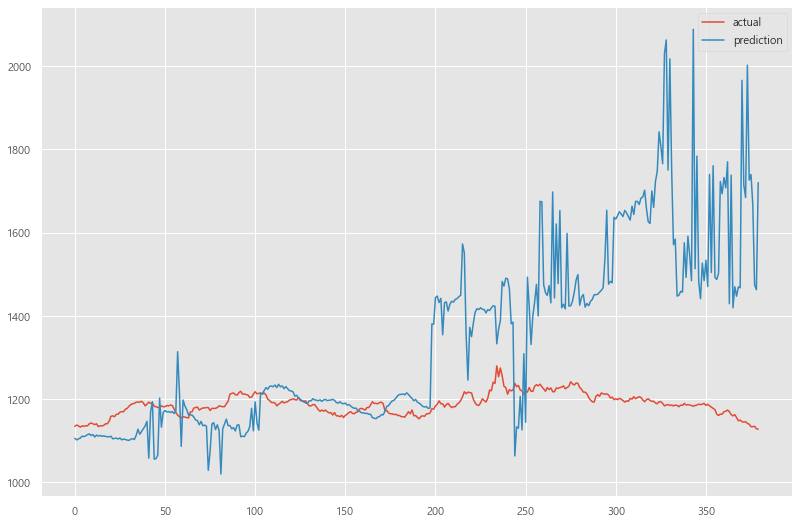

In [259]:

# weight 로딩
model.load_weights(filename)

# 예측
pred = model.predict(test_feature)

print(pred)

plt.figure(figsize=(12, 9))
plt.plot(test_label, label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()

In [260]:
df_dollar = df_dollar.dropna()

In [261]:
df_dollar = df_dollar.reset_index()

In [262]:
df_dollar.rename(columns = {'달러' : 'dollar'}, inplace = True)

In [263]:
df_dollar['dollar'] = df_dollar['dollar'].str.replace(',', '')
df_dollar['dollar'] = pd.to_numeric(df_dollar['dollar'])

In [264]:
df_dollar

,일자,dollar,oil_close,gold_close,nasdaq_close,dow_close,snp_close
0,2000-08-31,1109,33.099998,278.299988,4206.350098,11215.099609,1517.680054
1,2000-09-01,1109,33.380001,277.000000,4234.330078,11238.780273,1520.770020
2,2000-09-05,1105,33.799999,275.799988,4143.180176,11260.610352,1507.079956
3,2000-09-06,1105,34.950001,274.200012,4013.340088,11310.639648,1492.250000
4,2000-09-07,1106,35.330002,274.000000,4098.350098,11259.870117,1502.510010
...,...,...,...,...,...,...,...
4792,2020-10-22,1134,40.639999,1901.099976,11506.009766,28363.660156,3453.489990
4793,2020-10-23,1134,39.849998,1902.000000,11548.280273,28335.570313,3465.389893
4794,2020-10-26,1135,38.560001,1902.699951,11358.940430,27685.380859,3400.969971
4795,2020-10-27,1129,39.570000,1908.800049,11431.349609,27463.189453,3390.679932


In [ ]:
df_dollar.corr()

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(data = df_dollar.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

In [265]:
#상관관계를 살펴본 결과 oil말고는 크게 상관이 없는것으로 나타났음
#따라서 oil과 위에서 살펴본 엔화와 유로화만 추가하고 나머지는 제거하도록 함

In [5]:
df_money = pd.read_csv('./실습데이터/환율_종합.csv', parse_dates=['일자'], encoding='cp949')
df_oil = pd.read_csv('./실습데이터/oil.csv', parse_dates=['Date'], encoding='cp949')

In [6]:
df_money = df_money.drop(['위안'], axis=1)

In [7]:
df_oil

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-08-24,31.900000,32.240002,31.400000,31.629999,31.629999,72978.0
1,2000-08-25,31.700001,32.099998,31.320000,32.049999,32.049999,44601.0
2,2000-08-27,NaN,NaN,NaN,NaN,NaN,NaN
3,2000-08-28,32.040001,32.919998,31.860001,32.869999,32.869999,46770.0
4,2000-08-29,32.820000,33.029999,32.560001,32.720001,32.720001,49131.0
...,...,...,...,...,...,...,...
6190,2020-10-23,40.610001,40.919998,39.570000,39.849998,39.849998,268931.0
6191,2020-10-25,NaN,NaN,NaN,NaN,NaN,NaN
6192,2020-10-26,39.689999,39.740002,38.279999,38.560001,38.560001,360184.0
6193,2020-10-27,38.590000,39.830002,38.509998,39.570000,39.570000,339535.0


In [8]:
df_oil = df_oil.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1)

In [9]:
df_money = df_money[:-4]

In [10]:
df_money = df_money.set_index('일자')

In [11]:
df_oil.rename(columns={'Date':'일자', 'Close':'oil_close'}, inplace=True)

In [12]:
df_oil = df_oil.set_index('일자')

In [13]:
df_money = df_money.join(df_oil)

In [14]:
df_money = df_money.reset_index()

In [15]:
df_money

,일자,달러,엔화,유로,oil_close
0,1970-01-05,304,NaN,NaN,NaN
1,1970-01-06,304,NaN,NaN,NaN
2,1970-01-07,304,NaN,NaN,NaN
3,1970-01-08,304,NaN,NaN,NaN
4,1970-01-09,304,NaN,NaN,NaN
...,...,...,...,...,...
14000,2020-10-22,"1,134","1,084","1,344",40.639999
14001,2020-10-23,"1,134","1,081","1,341",39.849998
14002,2020-10-26,"1,135","1,084","1,344",38.560001
14003,2020-10-27,"1,129","1,077","1,333",39.570000


In [16]:
df_money = df_money.dropna()

In [17]:
df_money

,일자,달러,엔화,유로,oil_close
8987,2000-08-24,"1,115","1,042","1,005",31.629999
8988,2000-08-25,"1,114","1,043","1,004",32.049999
8990,2000-08-28,"1,114","1,043","1,006",32.869999
8991,2000-08-29,"1,113","1,047","1,002",32.720001
8992,2000-08-30,"1,111","1,048",992,33.400002
...,...,...,...,...,...
14000,2020-10-22,"1,134","1,084","1,344",40.639999
14001,2020-10-23,"1,134","1,081","1,341",39.849998
14002,2020-10-26,"1,135","1,084","1,344",38.560001
14003,2020-10-27,"1,129","1,077","1,333",39.570000


In [18]:
df_money['달러'] = df_money['달러'].str.replace(',', '')
df_money['달러'] = pd.to_numeric(df_money['달러'])
df_money['엔화'] = df_money['엔화'].str.replace(',', '')
df_money['엔화'] = pd.to_numeric(df_money['엔화'])
df_money['유로'] = df_money['유로'].str.replace(',', '')
df_money['유로'] = pd.to_numeric(df_money['유로'])

c:\users\694\anaconda3\envs\tf_study\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\694\anaconda3\envs\tf_study\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\694\anaconda3\envs\tf_study\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

In [19]:
df_money['oil_close'] = round(df_money['oil_close'], -1)

c:\users\694\anaconda3\envs\tf_study\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
df_money['oil_close'] = df_money['oil_close'].convert_dtypes()

c:\users\694\anaconda3\envs\tf_study\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
df_money

,일자,달러,엔화,유로,oil_close
8987,2000-08-24,1115,1042,1005,30
8988,2000-08-25,1114,1043,1004,30
8990,2000-08-28,1114,1043,1006,30
8991,2000-08-29,1113,1047,1002,30
8992,2000-08-30,1111,1048,992,30
...,...,...,...,...,...
14000,2020-10-22,1134,1084,1344,40
14001,2020-10-23,1134,1081,1341,40
14002,2020-10-26,1135,1084,1344,40
14003,2020-10-27,1129,1077,1333,40


In [283]:
#정규화 시켜주기
def min_max_scaling(x):
    x_np = np.asarray(x)
    return (x_np-x_np.min()) / (x_np.max() - x_np.min() + 1e-7)
#정규화 된 값을 원래의 값으로 되돌리기
def reverse_min_max_scaling(org_x, x):
    org_x_np = np.asarray(org_x)
    x_np = np.asarray(x)
    return (x_np + (org_x_np.max() - org_x_np.min() + 1e-7)) + org_x_np.min()

In [284]:
scale_cols = ['달러', '엔화', '유로', 'oil_close']
df_scaled = min_max_scaling(df_money[scale_cols])

In [285]:
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = scale_cols

print(df_scaled)

            달러        엔화        유로  oil_close
0     0.568685  0.532742  0.514525  0.0344658
1     0.568193  0.533235  0.514032  0.0344658
2     0.568193  0.533235  0.515017  0.0344658
3     0.567701  0.535204  0.513048  0.0344658
4     0.566716  0.535697  0.508124  0.0344658
...        ...       ...       ...        ...
4805   0.57804  0.553422  0.681438  0.0393895
4806   0.57804  0.551945  0.679961  0.0393895
4807  0.578533  0.553422  0.681438  0.0393895
4808  0.575579  0.549975  0.676022  0.0393895
4809  0.575086   0.55096   0.67356  0.0393895

[4810 rows x 4 columns]


In [286]:
df_scaled

,달러,엔화,유로,oil_close
0,0.568685,0.532742,0.514525,0.0344658
1,0.568193,0.533235,0.514032,0.0344658
2,0.568193,0.533235,0.515017,0.0344658
3,0.567701,0.535204,0.513048,0.0344658
4,0.566716,0.535697,0.508124,0.0344658
...,...,...,...,...
4805,0.57804,0.553422,0.681438,0.0393895
4806,0.57804,0.551945,0.679961,0.0393895
4807,0.578533,0.553422,0.681438,0.0393895
4808,0.575579,0.549975,0.676022,0.0393895


In [287]:
train = df_scaled[:-1200]
test = df_scaled[-1200:]

In [288]:
type(test)

pandas.core.frame.DataFrame

In [289]:
#데이터 셋을 만들어주는 함수 20일씩 묶어줌
def make_dataset(data, label, window_size=20):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [290]:
feature_cols = ['엔화', '유로', 'oil_close']
label_cols = ['달러']

train_feature = train[feature_cols]
train_label = train[label_cols]
test_feature = test[feature_cols]
test_label = test[label_cols]

# train dataset
train_feature, train_label = make_dataset(train_feature, train_label, 20)

# train, validation set 생성
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)

x_train.shape, x_valid.shape

# test dataset (실제 예측 해볼 데이터)
test_feature, test_label = make_dataset(test_feature, test_label, 20)
test_feature.shape, test_label.shape

((1180, 20, 3), (1180, 1))

In [291]:
x_train.shape, x_valid.shape

((2872, 20, 3), (718, 20, 3))

In [292]:
import tensorflow as tf
import os

In [293]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM

In [294]:
model = Sequential()
model.add(LSTM(16, 
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='relu', 
               return_sequences=False)
          )
model.add(Dense(1))

In [295]:
model_path = PATH = 'C:/Users/694/07.27-12.1_CLOUD/머신러닝을 위한 파이썬 문법' 

model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', patience=5)
filename = os.path.join(model_path, 'tml_checkpoint.h5')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

history = model.fit(x_train, y_train, 
                    epochs=200, 
                    batch_size=16,
                    validation_data=(x_valid, y_valid), 
                    callbacks=[early_stop, checkpoint])

Train on 2872 samples, validate on 718 samples
Epoch 1/200
2872/2872 [==============================] - 1s 430us/step - loss: 0.0067 - val_loss: 0.0042

Epoch 00001: val_loss improved from inf to 0.00421, saving model to C:/Users/694/07.27-12.1_CLOUD/머신러닝을 위한 파이썬 문법\tml_checkpoint.h5
Epoch 2/200
2872/2872 [==============================] - 1s 318us/step - loss: 0.0029 - val_loss: 0.0021

Epoch 00002: val_loss improved from 0.00421 to 0.00208, saving model to C:/Users/694/07.27-12.1_CLOUD/머신러닝을 위한 파이썬 문법\tml_checkpoint.h5
Epoch 3/200
2872/2872 [==============================] - 1s 316us/step - loss: 0.0015 - val_loss: 0.0018

Epoch 00003: val_loss improved from 0.00208 to 0.00177, saving model to C:/Users/694/07.27-12.1_CLOUD/머신러닝을 위한 파이썬 문법\tml_checkpoint.h5
Epoch 4/200
2872/2872 [==============================] - 1s 317us/step - loss: 0.0012 - val_loss: 0.0011

Epoch 00004: val_loss improved from 0.00177 to 0.00114, saving model to C:/Users/694/07.27-12.1_CLOUD/머신러닝을 위한 파이썬 문법\tml_che

In [296]:
# weight 로딩
model.load_weights(filename)

# 예측
pred = model.predict(test_feature)

In [297]:
print(pred)

[[0.5497002 ]
 [0.5493625 ]
 [0.54854953]
 ...
 [0.61320156]
 [0.61326003]
 [0.61246145]]


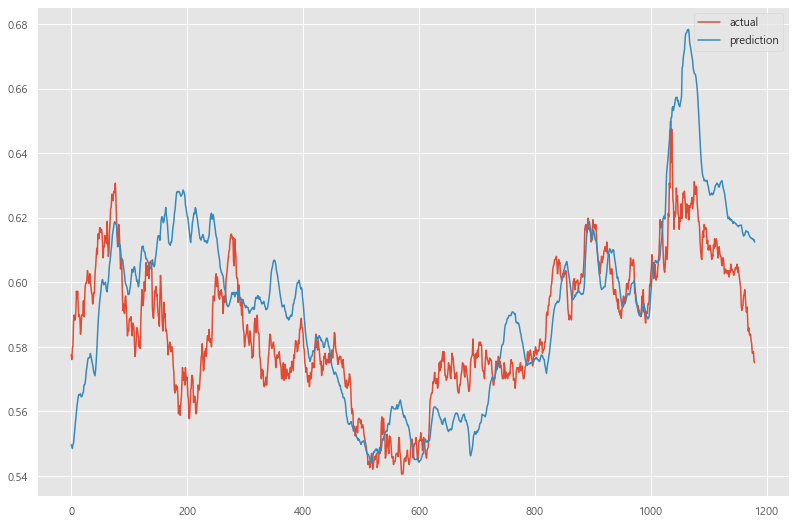

In [298]:
plt.figure(figsize=(12, 9))
plt.plot(test_label, label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()

In [ ]:
#정확도를 올리기 위한 상태유지 스택 순환 신경망모델

In [ ]:
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def create_dataset(signal_data, look_back=1):
    dataX, dataY = [], []
    for i in range(len(signal_data)-look_back):
        dataX.append(signal_data[i:(i+look_back), 0])
        dataY.append(signal_data[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

class CustomHistory(keras.callbacks.Callback):
    def init(self):
        self.train_loss = []
        self.val_loss = []
        
    def on_epoch_end(self, batch, logs={}):
        self.train_loss.append(logs.get('loss'))
        self.val_loss.append(logs.get('val_loss'))

In [ ]:
scale_cols = ['달러', '엔화', '유로', 'oil_close']
df_scaled = min_max_scaling(df_money[scale_cols])

In [ ]:
look_back = 40

#전처리된 데이터프레임
df_scaled

# 데이터 분리
train = df_scaled[0:2400]
val = df_scaled[2400:3600]
test = df_scaled[3600:]

# 데이터셋 생성
x_train, y_train = create_dataset(train, look_back)
x_val, y_val = create_dataset(val, look_back)
x_test, y_test = create_dataset(test, look_back)

# 데이터셋 전처리
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
# 2. 모델 구성하기
model = Sequential()
for i in range(2):
    model.add(LSTM(32, batch_input_shape=(1, look_back, 1), stateful=True, return_sequences=True))
    model.add(Dropout(0.3))
model.add(LSTM(32, batch_input_shape=(1, look_back, 1), stateful=True))
model.add(Dropout(0.3))
model.add(Dense(1))

In [ ]:
# 3. 모델 학습과정 설정하기
model.compile(loss='mean_squared_error', optimizer='adam')

# 4. 모델 학습시키기
custom_hist = CustomHistory()
custom_hist.init()

In [ ]:
for i in range(200):
    model.fit(x_train, y_train, epochs=1, batch_size=1, shuffle=False, callbacks=[custom_hist], validation_data=(x_val, y_val))
    model.reset_states()

In [ ]:
# 5. 학습과정 살펴보기
plt.plot(custom_hist.train_loss)
plt.plot(custom_hist.val_loss)
plt.ylim(0.0, 0.15)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# 6. 모델 평가하기
trainScore = model.evaluate(x_train, y_train, batch_size=1, verbose=0)
model.reset_states()
print('Train Score: ', trainScore)
valScore = model.evaluate(x_val, y_val, batch_size=1, verbose=0)
model.reset_states()
print('Validataion Score: ', valScore)
testScore = model.evaluate(x_test, y_test, batch_size=1, verbose=0)
model.reset_states()
print('Test Score: ', testScore)

In [ ]:
# 7. 모델 사용하기
look_ahead = 250
xhat = x_test[0]
predictions = np.zeros((look_ahead,1))
for i in range(look_ahead):
    prediction = model.predict(np.array([xhat]), batch_size=1)
    predictions[i] = prediction
    xhat = np.vstack([xhat[1:],prediction])
    
plt.figure(figsize=(12,5))
plt.plot(np.arange(look_ahead),predictions,'r',label="prediction")
plt.plot(np.arange(look_ahead),y_test[:look_ahead],label="test function")
plt.legend()
plt.show()

In [ ]:
#전혀 예측 못함..

In [ ]:
#LSTM

In [75]:
#VIZ AND DATA MANIPULATION LIBRARY
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')

from plotly import tools
import plotly_express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [76]:
#Preprocessing
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from scipy.stats import uniform

In [77]:
#MODELS
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
import xgboost as xgb
from xgboost import XGBRegressor
from bayes_opt import BayesianOptimization

In [78]:
#CLASSICAL STATS
import scipy
import statsmodels
from scipy.stats import boxcox
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from fbprophet import Prophet
from statsmodels.tsa.statespace import sarimax
from statsmodels.tsa.seasonal import seasonal_decompose


In [79]:
#DEEP LEARNING LIB
from keras.models import Model,Sequential
from keras.utils import np_utils, to_categorical
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.utils import plot_model
import itertools
import lightgbm as lgb


In [80]:
#METRICS
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report, r2_score,mean_absolute_error,mean_squared_error

from random import randrange
import warnings 
warnings.filterwarnings('ignore')

In [81]:
df = pd.read_csv("./실습데이터/환율/Foreign_Exchange_Rates.csv", encoding='cp949')
print('DATASET SHAPE: ', df.shape)
df.head()

DATASET SHAPE:  (5217, 24)


,Unnamed: 0,Time Serie,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,...,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
0,0,2000-01-03,1.5172,0.9847,1.9033,0.6146,1.805,1.4465,8.2798,7.7765,...,1.6563,7.329,101.7,3.8,7.964,8.443,72.3,1.5808,31.38,36.97
1,1,2000-01-04,1.5239,0.97,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,...,1.6535,7.218,103.09,3.8,7.934,8.36,72.65,1.5565,30.6,37.13
2,2,2000-01-05,1.5267,0.9676,1.9339,0.6092,1.856,1.4518,8.2798,7.778,...,1.656,7.208,103.77,3.8,7.935,8.353,72.95,1.5526,30.8,37.1
3,3,2000-01-06,1.5291,0.9686,1.9436,0.607,1.84,1.4571,8.2797,7.7785,...,1.6655,7.2125,105.19,3.8,7.94,8.3675,72.95,1.554,31.75,37.62
4,4,2000-01-07,1.5272,0.9714,1.938,0.6104,1.831,1.4505,8.2794,7.7783,...,1.6625,7.2285,105.17,3.8,7.966,8.415,73.15,1.5623,30.85,37.3


In [82]:
#show columns
df.columns = [col.lower() for col in df.columns]
df['time serie'] = pd.to_datetime(df['time serie'])
df.columns

Index(['unnamed: 0', 'time serie', 'australia - australian dollar/us$',
       'euro area - euro/us$', 'new zealand - new zeland dollar/us$',
       'united kingdom - united kingdom pound/us$', 'brazil - real/us$',
       'canada - canadian dollar/us$', 'china - yuan/us$',
       'hong kong - hong kong dollar/us$', 'india - indian rupee/us$',
       'korea - won/us$', 'mexico - mexican peso/us$',
       'south africa - rand/us$', 'singapore - singapore dollar/us$',
       'denmark - danish krone/us$', 'japan - yen/us$',
       'malaysia - ringgit/us$', 'norway - norwegian krone/us$',
       'sweden - krona/us$', 'sri lanka - sri lankan rupee/us$',
       'switzerland - franc/us$', 'taiwan - new taiwan dollar/us$',
       'thailand - baht/us$'],
      dtype='object')

In [83]:
#get the date and rates of singapore dollar
data = df[['time serie', 'korea - won/us$']]
data.columns = ['date', 'rate']

In [84]:
#show new dataframe
data.head()

,date,rate
0,2000-01-03,1128
1,2000-01-04,1122.5
2,2000-01-05,1135
3,2000-01-06,1146.5
4,2000-01-07,1138


In [85]:
#show feature data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5217 entries, 0 to 5216
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    5217 non-null   datetime64[ns]
 1   rate    5217 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 81.6+ KB


In [86]:
#remove rates with a value of ND
data = data.drop(data[data['rate']=='ND'].index)
#converte the rates to numeric value
data['rate'] = pd.to_numeric(data.rate)
#sort values by date
data = data.sort_values('date', ascending=True)

In [87]:
#show basic stats
data.rate.describe()

count    5019.000000
mean     1125.442508
std       103.479027
min       903.200000
25%      1067.360000
50%      1127.760000
75%      1180.000000
max      1570.100000
Name: rate, dtype: float64

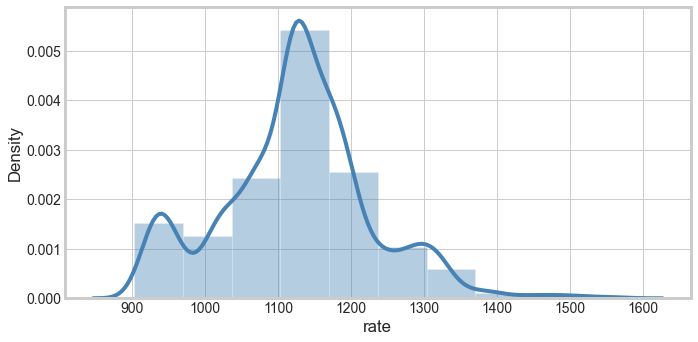

In [88]:
plt.figure(figsize=(10,5))
sns.distplot(data.rate, bins=10, color='steelblue');

In [156]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=data.date, y=data.rate, marker_color='lightgreen'))

fig.update_layout(title='TIME-SERIES PLOT OF WON DOLLAR RATE', 
                  height=450, width=1000, template='plotly_dark', font_color='lightgreen', 
                  font=dict(family="sans serif",
                            size=16,
                            color="grey"
                            ))

fig.update_xaxes(title='Date')
fig.update_yaxes(title='Rate / $')
fig.show()

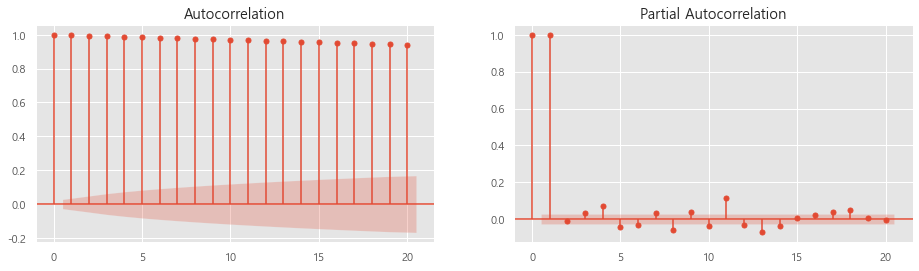

In [158]:
fig, ax = plt.subplots(1,2,figsize=(14,4))
plot_acf(data.rate, lags=20, ax=ax[0]);
plot_pacf(data.rate, lags=20, ax=ax[1]);

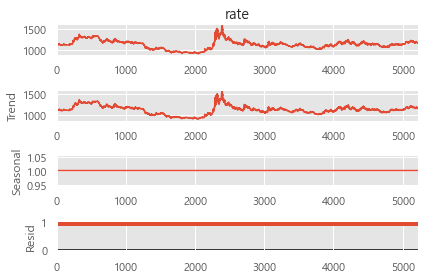

In [159]:
sdec = seasonal_decompose(data.rate, model='multiplicative', freq=1)
sdec.plot();

In [89]:
X_train, X_val = data[:-30], data[-30:]

print('X_train Shape: ', X_train.shape)
print('X_val Shape: ', X_val.shape)

X_train Shape:  (4989, 2)
X_val Shape:  (30, 2)


In [161]:
predictions = []

arima = sm.tsa.statespace.SARIMAX(X_train.rate,order=(1,1,1),seasonal_order=(1,1,1,6),
                                  enforce_stationarity=False, enforce_invertibility=False,).fit()
#get a 30 days prediction
predictions.append(arima.forecast(30))
#converting and reshaping 
predictions = np.array(predictions).reshape((30,))

In [162]:
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                              rate   No. Observations:                 4989
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 6)   Log Likelihood              -17610.210
Date:                           Mon, 02 Nov 2020   AIC                          35230.420
Time:                                   18:04:52   BIC                          35262.980
Sample:                                        0   HQIC                         35241.835
                                          - 4989                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6576      0.113      5.808      0.000       0.436       0.880
ma.L1         -1.4861      0.246     -6.040      0.000      -1.968      -1.004
ar.S.L6       -0.0112      0.004     -3.104      0.002      -0.018      -0.004
ma.S.L6       -1.0000      0.402     -2.486      0.013      -1.788      -0.212
sigma2        31.2897     16.374      1.911      0.056      -0.803      63.382
===================================================================================
Ljung-Box (L1) (Q):                   3.00   Jarque-Bera (JB):            996009.61
Prob(Q):                              0.08   Prob(JB):                         0.00
Heteroskedasticity (H):               1.27   Skew:                            -0.74
Prob(H) (two-sided):                  0.00   Kurtosis:                        72.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

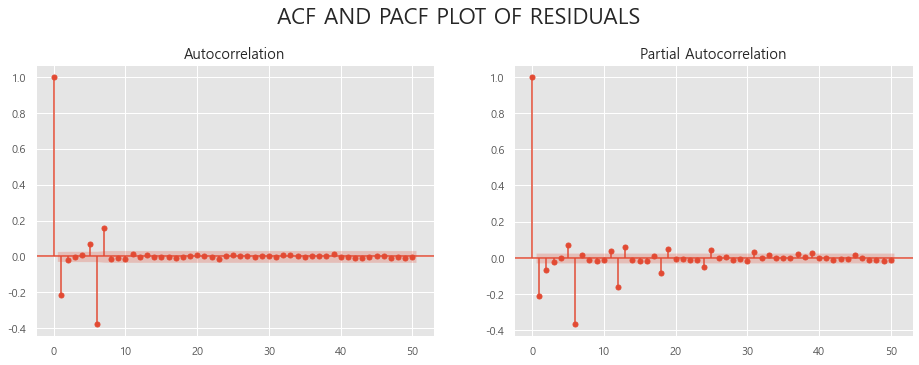

In [163]:
res = arima.resid
fig,ax = plt.subplots(1,2,figsize=(14,5))
plt.suptitle('ACF AND PACF PLOT OF RESIDUALS', fontsize=22, x=0.5, y=1.04)
fig = sm.graphics.tsa.plot_acf(res, lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(res, lags=50, ax=ax[1])
plt.show()

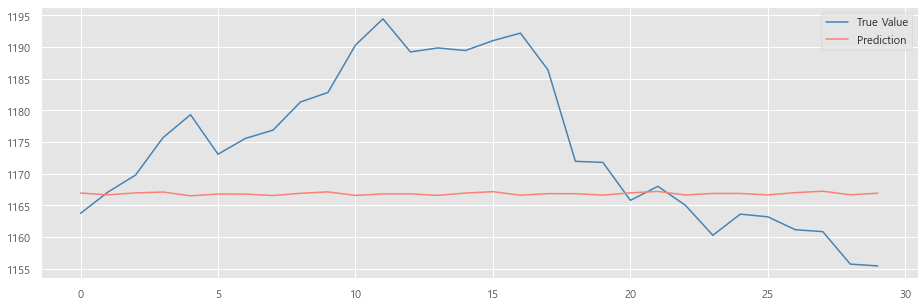

In [164]:
y_val = data.rate[-30:]
plt.figure(figsize=(14,5))
plt.plot(np.arange(len(y_val)), y_val, color='steelblue');
plt.plot(np.arange(len(y_val)), predictions, color='salmon');
plt.legend(['True Value', 'Prediction']);

In [ ]:
arima_mae = mean_absolute_error(y_val, predictions)
arima_mse = mean_squared_error(y_val, predictions)
arima_rmse = np.sqrt(mean_squared_error(y_val, predictions))

print('Mean Absolute Error:   ', arima_mae)
print('Mean Squared Error:   ', arima_mse)
print('Root Mean Squared Error:   ', arima_rmse)

In [ ]:
arima_error_rate = abs(((y_val - predictions) / y_val).mean()) * 100
print('MAPE:', round(arima_error_rate,2), '%')

In [ ]:
print('R2-SCORE: ', r2_score(y_val, predictions))

In [200]:
df = pd.read_csv("./실습데이터/환율/원달러.csv", encoding='cp949')
print('DATASET SHAPE: ', df.shape)
df.head()

DATASET SHAPE:  (4425, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-12-01,1197.300049,1203.500000,1195.000000,1198.400024,1198.400024,0.0
1,2003-12-02,1198.099976,1198.500000,1186.199951,1195.000000,1195.000000,0.0
2,2003-12-03,1195.000000,1198.400024,1192.500000,1192.500000,1192.500000,0.0
3,2003-12-04,1192.599976,1197.900024,1174.800049,1190.099976,1190.099976,0.0
4,2003-12-05,1189.400024,1193.800049,1178.599976,1184.699951,1184.699951,0.0


In [201]:
df = df.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1)

In [202]:
df['Date'] = pd.to_datetime(df['Date'])

In [203]:
df.head(20)

,Date,Close
0,2003-12-01,1198.400024
1,2003-12-02,1195.000000
2,2003-12-03,1192.500000
3,2003-12-04,1190.099976
4,2003-12-05,1184.699951
5,2003-12-08,1185.599976
6,2003-12-09,1182.699951
7,2003-12-10,1176.400024
8,2003-12-11,1169.900024
9,2003-12-12,1173.199951


In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4425 entries, 0 to 4424
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    4425 non-null   datetime64[ns]
 1   Close   4384 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 69.3 KB


In [205]:
#결측치 존재

In [206]:
#결측지 확인
df[df.isna().sum(axis=1) == True]

,Date,Close
238,2004-10-28,NaN
472,2005-09-21,NaN
985,2007-09-10,NaN
1040,2007-11-26,NaN
1056,2007-12-18,NaN
1131,2008-04-01,NaN
1153,2008-05-01,NaN
1196,2008-07-01,NaN
1219,2008-08-01,NaN
1220,2008-08-04,NaN


In [207]:
#앞의값으로 na값 채우기
df = df.fillna(method='ffill')

In [208]:
#결측치 모두 제거
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4425 entries, 0 to 4424
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    4425 non-null   datetime64[ns]
 1   Close   4425 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 69.3 KB


In [209]:
#df.Close = pd.to_numeric(df.Close)

In [210]:
#df['Close'] = round(df['Close'], -1)
#df['Close'] = df['Close'].convert_dtypes()

In [211]:
df

,Date,Close
0,2003-12-01,1198.400024
1,2003-12-02,1195.000000
2,2003-12-03,1192.500000
3,2003-12-04,1190.099976
4,2003-12-05,1184.699951
...,...,...
4420,2020-11-09,1134.339966
4421,2020-11-10,1134.339966
4422,2020-11-11,1134.339966
4423,2020-11-12,1134.339966


In [212]:
#XGBOOST
#extract the date feature
df['day'] = df.Date.dt.day
df['dayofweek'] = df.Date.dt.dayofweek
df['dayofyear'] = df.Date.dt.dayofyear
df['week'] = df.Date.dt.week
df['month'] = df.Date.dt.month
df['year'] = df.Date.dt.year

In [221]:
df = df.drop(['Date'], axis=1)

In [222]:
df

,Close,day,dayofweek,dayofyear,week,month,year,lag1,lag2,lag3,lag4,lag5,lag6,lag7
0,1198.400024,1,0,335,49,12,2003,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1195.000000,2,1,336,49,12,2003,1198.400024,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,1192.500000,3,2,337,49,12,2003,1195.000000,1198.400024,0.000000,0.000000,0.000000,0.000000,0.000000
3,1190.099976,4,3,338,49,12,2003,1192.500000,1195.000000,1198.400024,0.000000,0.000000,0.000000,0.000000
4,1184.699951,5,4,339,49,12,2003,1190.099976,1192.500000,1195.000000,1198.400024,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4420,1134.339966,9,0,314,46,11,2020,1134.339966,1134.339966,1134.339966,1134.339966,1134.339966,1134.339966,1134.180054
4421,1134.339966,10,1,315,46,11,2020,1134.339966,1134.339966,1134.339966,1134.339966,1134.339966,1134.339966,1134.339966
4422,1134.339966,11,2,316,46,11,2020,1134.339966,1134.339966,1134.339966,1134.339966,1134.339966,1134.339966,1134.339966
4423,1134.339966,12,3,317,46,11,2020,1134.339966,1134.339966,1134.339966,1134.339966,1134.339966,1134.339966,1134.339966


In [214]:
#시계열 데이터에서 이전데이터를 현재 데이터에 넣으면 좀 더 정확한 학습이 가능
#이것을 lag(지연 데이터라고 표현)
#lag 데이터를 만들어보도록 함

In [215]:
for i in range(1,8):
    df['lag'+str(i)] = df.Close.shift(i).fillna(0)

In [104]:
#지금 강제로 15일치 날자를 추가해줌 따로 분리해주기

In [79]:
df1 = df[:-15]
df2 = df[-15:]

In [82]:
df1 = df1.fillna(method='ffill')

In [84]:
df1.info()
#결측지 다 채워주기

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4415 entries, 0 to 4414
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       4415 non-null   datetime64[ns]
 1   Close      4415 non-null   float64       
 2   day        4415 non-null   int64         
 3   dayofweek  4415 non-null   int64         
 4   dayofyear  4415 non-null   int64         
 5   week       4415 non-null   int64         
 6   month      4415 non-null   int64         
 7   year       4415 non-null   int64         
 8   lag1       4415 non-null   float64       
 9   lag2       4415 non-null   float64       
 10  lag3       4415 non-null   float64       
 11  lag4       4415 non-null   float64       
 12  lag5       4415 non-null   float64       
 13  lag6       4415 non-null   float64       
 14  lag7       4415 non-null   float64       
dtypes: datetime64[ns](1), float64(8), int64(6)
memory usage: 517.5 KB


In [87]:
df2

,Date,Close,day,dayofweek,dayofyear,week,month,year,lag1,lag2,lag3,lag4,lag5,lag6,lag7
4415,2020-11-02,NaN,2,0,307,45,11,2020,1134.339966,1134.180054,1128.229980,1131.640015,1127.760010,1134.150024,1132.030029
4416,2020-11-03,NaN,3,1,308,45,11,2020,0.000000,1134.339966,1134.180054,1128.229980,1131.640015,1127.760010,1134.150024
4417,2020-11-04,NaN,4,2,309,45,11,2020,0.000000,0.000000,1134.339966,1134.180054,1128.229980,1131.640015,1127.760010
4418,2020-11-05,NaN,5,3,310,45,11,2020,0.000000,0.000000,0.000000,1134.339966,1134.180054,1128.229980,1131.640015
4419,2020-11-06,NaN,6,4,311,45,11,2020,0.000000,0.000000,0.000000,0.000000,1134.339966,1134.180054,1128.229980
4420,2020-11-09,NaN,9,0,314,46,11,2020,0.000000,0.000000,0.000000,0.000000,0.000000,1134.339966,1134.180054
4421,2020-11-10,NaN,10,1,315,46,11,2020,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1134.339966
4422,2020-11-11,NaN,11,2,316,46,11,2020,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4423,2020-11-12,NaN,12,3,317,46,11,2020,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4424,2020-11-13,NaN,13,4,318,46,11,2020,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [85]:
#drop the Date feature
df1.drop('Date', axis=1, inplace=True)
df1.head(7)

,Close,day,dayofweek,dayofyear,week,month,year,lag1,lag2,lag3,lag4,lag5,lag6,lag7
0,1198.400024,1,0,335,49,12,2003,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,1195.000000,2,1,336,49,12,2003,1198.400024,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,1192.500000,3,2,337,49,12,2003,1195.000000,1198.400024,0.000000,0.000000,0.000000,0.000000,0.0
3,1190.099976,4,3,338,49,12,2003,1192.500000,1195.000000,1198.400024,0.000000,0.000000,0.000000,0.0
4,1184.699951,5,4,339,49,12,2003,1190.099976,1192.500000,1195.000000,1198.400024,0.000000,0.000000,0.0
5,1185.599976,8,0,342,50,12,2003,1184.699951,1190.099976,1192.500000,1195.000000,1198.400024,0.000000,0.0
6,1182.699951,9,1,343,50,12,2003,1185.599976,1184.699951,1190.099976,1192.500000,1195.000000,1198.400024,0.0


In [88]:
df2.drop('Date', axis=1, inplace=True)
df2.head(7)

,Close,day,dayofweek,dayofyear,week,month,year,lag1,lag2,lag3,lag4,lag5,lag6,lag7
4415,NaN,2,0,307,45,11,2020,1134.339966,1134.180054,1128.229980,1131.640015,1127.760010,1134.150024,1132.030029
4416,NaN,3,1,308,45,11,2020,0.000000,1134.339966,1134.180054,1128.229980,1131.640015,1127.760010,1134.150024
4417,NaN,4,2,309,45,11,2020,0.000000,0.000000,1134.339966,1134.180054,1128.229980,1131.640015,1127.760010
4418,NaN,5,3,310,45,11,2020,0.000000,0.000000,0.000000,1134.339966,1134.180054,1128.229980,1131.640015
4419,NaN,6,4,311,45,11,2020,0.000000,0.000000,0.000000,0.000000,1134.339966,1134.180054,1128.229980
4420,NaN,9,0,314,46,11,2020,0.000000,0.000000,0.000000,0.000000,0.000000,1134.339966,1134.180054
4421,NaN,10,1,315,46,11,2020,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1134.339966


In [180]:
df

,Date,Close,day,dayofweek,dayofyear,week,month,year,lag1,lag2,lag3,lag4,lag5,lag6,lag7
0,2003-12-01,1200,1,0,335,49,12,2003,0,0,0,0,0,0,0
1,2003-12-02,1200,2,1,336,49,12,2003,1200,0,0,0,0,0,0
2,2003-12-03,1190,3,2,337,49,12,2003,1200,1200,0,0,0,0,0
3,2003-12-04,1190,4,3,338,49,12,2003,1190,1200,1200,0,0,0,0
4,2003-12-05,1180,5,4,339,49,12,2003,1190,1190,1200,1200,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4420,2020-11-09,1130,9,0,314,46,11,2020,1130,1130,1130,1130,1130,1130,1130
4421,2020-11-10,1130,10,1,315,46,11,2020,1130,1130,1130,1130,1130,1130,1130
4422,2020-11-11,1130,11,2,316,46,11,2020,1130,1130,1130,1130,1130,1130,1130
4423,2020-11-12,1130,12,3,317,46,11,2020,1130,1130,1130,1130,1130,1130,1130


In [ ]:
#test data를 따로 만들어주기

In [223]:
X = df.drop('Close', axis=1)
y = df.Close

X_train = X[:-10]
X_test = X[-10:]
y_train = y[:-10]
y_test = y[-10:]

print('X_train: ', X_train.shape)
print('y_train: ', y_train.shape)
print('X_test: ', X_test.shape)
print('y_test: ', y_test.shape)

X_train:  (4415, 13)
y_train:  (4415,)
X_test:  (10, 13)
y_test:  (10,)


In [224]:
X_train

,day,dayofweek,dayofyear,week,month,year,lag1,lag2,lag3,lag4,lag5,lag6,lag7
0,1,0,335,49,12,2003,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2,1,336,49,12,2003,1198.400024,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,3,2,337,49,12,2003,1195.000000,1198.400024,0.000000,0.000000,0.000000,0.000000,0.000000
3,4,3,338,49,12,2003,1192.500000,1195.000000,1198.400024,0.000000,0.000000,0.000000,0.000000
4,5,4,339,49,12,2003,1190.099976,1192.500000,1195.000000,1198.400024,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4410,26,0,300,44,10,2020,1134.150024,1132.030029,1136.000000,1137.000000,1141.180054,1144.130005,1146.310059
4411,27,1,301,44,10,2020,1127.760010,1134.150024,1132.030029,1136.000000,1137.000000,1141.180054,1144.130005
4412,28,2,302,44,10,2020,1131.640015,1127.760010,1134.150024,1132.030029,1136.000000,1137.000000,1141.180054
4413,29,3,303,44,10,2020,1128.229980,1131.640015,1127.760010,1134.150024,1132.030029,1136.000000,1137.000000


In [226]:
#convert data to xgb matrix form
dtrain = xgb.DMatrix(X_train,label=y_train)
dtest = xgb.DMatrix(X_test)

In [227]:
#define the params
def xgb_evaluate(max_depth, gamma, colsample_bytree):
    params = {'eval_metric': 'rmse',
              'max_depth': int(max_depth),
              'subsample': 0.8,
              'eta': 0.1,
              'gamma': gamma,
              'colsample_bytree': colsample_bytree}
    
    cv_result = xgb.cv(params, dtrain, num_boost_round=250, nfold=3)    
    return -1.0 * cv_result['test-rmse-mean'].iloc[-1]

In [228]:
#run optimizer
xgb_bo = BayesianOptimization(xgb_evaluate, {'max_depth': (3, 7), 
                                             'gamma': (0, 1),
                                             'colsample_bytree': (0.3, 0.9)})
#define iter points
xgb_bo.maximize(init_points=10, n_iter=15, acq='ei')

|   iter    |  target   | colsam... |   gamma   | max_depth |
-------------------------------------------------------------
|  1        | -11.81    |  0.4433   |  0.6648   |  6.561    |
|  2        | -12.2     |  0.3222   |  0.5061   |  4.849    |
|  3        | -11.81    |  0.5051   |  0.4092   |  4.557    |
|  4        | -11.81    |  0.5045   |  0.4956   |  4.367    |
|  5        | -11.85    |  0.7994   |  0.8916   |  5.167    |
|  6        | -11.77    |  0.8061   |  0.1784   |  4.238    |
|  7        | -11.84    |  0.4508   |  0.6521   |  5.336    |
|  8        | -11.92    |  0.5626   |  0.5052   |  3.554    |
|  9        | -11.77    |  0.8417   |  0.3267   |  4.708    |
|  10       | -12.05    |  0.3835   |  0.8282   |  6.178    |
|  11       | -11.72    |  0.8758   |  0.169    |  6.46     |
|  12       | -11.72    |  0.8959   |  0.1873   |  6.466    |
|  13       | -11.86    |  0.7389   |  0.2427   |  6.53     |
|  14       | -11.71    |  0.8788   |  0.1429   |  6.304    |
|  15   

In [229]:
#get the best parameters
params = xgb_bo.max['params']
params['max_depth'] = int(round(params['max_depth']))
#train the data
model = xgb.train(params, dtrain, num_boost_round=200)

In [230]:
#predict the test data 
predictions = model.predict(dtest)

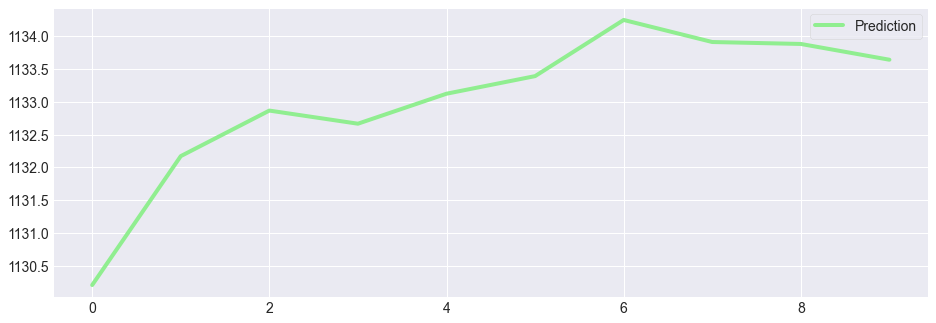

In [233]:
y_val = df.Close[-10:]
plt.figure(figsize=(14,5))
sns.set_style('darkgrid')
plt.plot(np.arange(len(y_val)), predictions, color='lightgreen');
plt.legend(['Prediction']);

In [234]:
xgb_mae = mean_absolute_error(y_val, predictions)
xgb_mse = mean_squared_error(y_val, predictions)
xgb_rmse = np.sqrt(mean_squared_error(y_val, predictions))

print('Mean Absolute Error:   ', xgb_mae)
print('Mean Squared Error:   ', xgb_mse)
print('Root Mean Squared Error:   ', xgb_rmse)

Mean Absolute Error:    1.329821957031254
Mean Squared Error:    3.0027056898421716
Root Mean Squared Error:    1.7328316969175546


In [235]:
xgb_error_rate = abs(((y_val - predictions) / y_val).mean()) * 100
print('MAPE:', round(xgb_error_rate,2), '%')

MAPE: 0.12 %


In [236]:
print('R2-SCORE: ', r2_score(y_val, predictions))

R2-SCORE:  0.0


In [41]:
#5일뒤 예측

In [ ]:
x = np.concatenate((scaled_price_indicator, scaled_volume_indicator, scaled_etc_indicator), axis=1) # axis=1
y = x[:, [3]]

In [3]:
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
import logging
import math
import os
from sklearn.preprocessing import MinMaxScaler
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Activation, Flatten
from keras import optimizers
from sklearn.metrics import mean_squared_error
from keras.models import load_model

Using TensorFlow backend.


In [4]:
np.random.seed(7)

In [22]:
df = df_money

In [23]:
df

,일자,달러,엔화,유로,oil_close
8987,2000-08-24,1115,1042,1005,30
8988,2000-08-25,1114,1043,1004,30
8990,2000-08-28,1114,1043,1006,30
8991,2000-08-29,1113,1047,1002,30
8992,2000-08-30,1111,1048,992,30
...,...,...,...,...,...
14000,2020-10-22,1134,1084,1344,40
14001,2020-10-23,1134,1081,1341,40
14002,2020-10-26,1135,1084,1344,40
14003,2020-10-27,1129,1077,1333,40


In [24]:
scaler = MinMaxScaler(feature_range=(0, 1)) # 0~1 값으로 스케일링
scaler_etc = MinMaxScaler(feature_range=(-1, 1)) # 0~1 값으로 스케일링

In [30]:
price_indicator = df.loc[:, '달러':'oil_close']

In [31]:
price_indicator

,달러,엔화,유로,oil_close
8987,1115,1042,1005,30
8988,1114,1043,1004,30
8990,1114,1043,1006,30
8991,1113,1047,1002,30
8992,1111,1048,992,30
...,...,...,...,...
14000,1134,1084,1344,40
14001,1134,1081,1341,40
14002,1135,1084,1344,40
14003,1129,1077,1333,40


In [32]:
scaled_price_indicator = scaler.fit_transform(price_indicator)

In [33]:
scaled_price_indicator

array([[0.31696429, 0.33828571, 0.0600572 , 0.36842105],
       [0.31547619, 0.33942857, 0.05910391, 0.36842105],
       [0.31547619, 0.33942857, 0.06101049, 0.36842105],
       ...,
       [0.34672619, 0.38628571, 0.38322212, 0.42105263],
       [0.33779762, 0.37828571, 0.37273594, 0.42105263],
       [0.33630952, 0.38057143, 0.36796949, 0.42105263]])

In [39]:
x = scaled_price_indicator

In [42]:
y = x[:,[0]]

In [43]:
y

array([[0.31696429],
       [0.31547619],
       [0.31547619],
       ...,
       [0.34672619],
       [0.33779762],
       [0.33630952]])

In [44]:
seq_length = 30
predict_day = 5

In [72]:
#4810 - 30 - 5
predict_day

5

In [45]:
dataX = [] # 입력으로 사용될 Sequence Data / Input - Sequence Data
dataY = [] # 출력(타켓)으로 사용 / Output(target)
for i in range(0, int(len(y) - seq_length - predict_day)):
    _x = x[i : i + seq_length]
    _y = y[i + predict_day : i + seq_length + predict_day] # 다음 나타날 주가(정답) / after 5 days later (in _x), 'Close' price is the correct answer.
    dataX.append(_x) # dataX 리스트에 추가 / add to dataX's list
    dataY.append(_y) # dataY 리스트에 추가 / add to dataY's list

In [46]:
# 학습용 데이터 생성 / Creating Train Set
train_size = int(len(dataY))

# 데이터를 잘라 학습용 데이터 생성 / Slicing Train Set
trainX = np.array(dataX[0:train_size])
trainY = np.array(dataY[0:train_size])

print("="*50)
print(_x.shape)
print(_y.shape)
print(trainX.shape)
print(trainY.shape)
print("="*50)

(30, 4)
(30, 1)
(4775, 30, 4)
(4775, 30, 1)


In [54]:
## LSTM 모델 / LSTM Model

input_columns = 4 # 데이터 셋의 '열' 개수 (dataX) / dataset's columns (dataX)

model = Sequential()
model.add(LSTM(256, batch_input_shape=(25, 30, input_columns), return_sequences=True, stateful=True, dropout=0.7))
model.add(LSTM(256, return_sequences=True, stateful=True, dropout=0.7))
model.add(LSTM(256, return_sequences=True, stateful=True, dropout=0.7))
model.add(Dense(1))
model.add(Activation('softsign'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (25, 30, 256)             267264    
_________________________________________________________________
lstm_8 (LSTM)                (25, 30, 256)             525312    
_________________________________________________________________
lstm_9 (LSTM)                (25, 30, 256)             525312    
_________________________________________________________________
dense_3 (Dense)              (25, 30, 1)               257       
_________________________________________________________________
activation_3 (Activation)    (25, 30, 1)               0         
Total params: 1,318,145
Trainable params: 1,318,145
Non-trainable params: 0
_________________________________________________________________


In [55]:
# 모델 학습 설정 및 진행 / Model Training options and Progress
keras.optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='mean_squared_error', optimizer='adam')
hist = model.fit(trainX, trainY, epochs=10, batch_size=25, verbose=1)


Epoch 1/10
4775/4775 [==============================] - 35s 7ms/step - loss: 0.0278
Epoch 2/10
4775/4775 [==============================] - 36s 7ms/step - loss: 0.0232
Epoch 3/10
4775/4775 [==============================] - 37s 8ms/step - loss: 0.0218
Epoch 4/10
4775/4775 [==============================] - 37s 8ms/step - loss: 0.0214
Epoch 5/10
4775/4775 [==============================] - 35s 7ms/step - loss: 0.0206
Epoch 6/10
4775/4775 [==============================] - 35s 7ms/step - loss: 0.0200
Epoch 7/10
4775/4775 [==============================] - 35s 7ms/step - loss: 0.0196
Epoch 8/10
4775/4775 [==============================] - 34s 7ms/step - loss: 0.0193
Epoch 9/10
4775/4775 [==============================] - 35s 7ms/step - loss: 0.0188
Epoch 10/10
4775/4775 [==============================] - 36s 8ms/step - loss: 0.0184


No handles with labels found to put in legend.


[0.02784091733513078, 0.023172810859002992, 0.02183687250758887, 0.021437428874592664, 0.020594594897751096, 0.020016583028927212, 0.019585311232398005, 0.019329414266546826, 0.018786333754892748, 0.018358675494829085]


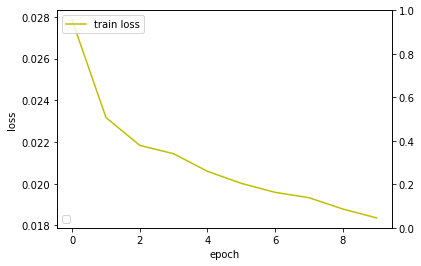

In [56]:
# 학습 과정 살펴보기 / watching train loss
print(hist.history['loss'])
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.show()


In [58]:
model.save('lstm_dollar_prediction.h5')

In [59]:
# 학습용/테스트용 데이터 생성
test_size = int(len(dataY))

# 데이터를 잘라 학습용 데이터 생성
testX = np.array(dataX[0:test_size])
testY = np.array(dataY[0:test_size])

print("="*50)
print(_x.shape)
print(_y.shape)
print(testX.shape)
print(testY.shape)
print("="*50)

(30, 4)
(30, 1)
(4775, 30, 4)
(4775, 30, 1)


In [73]:
testX

array([[[0.31696429, 0.33828571, 0.0600572 , 0.36842105],
        [0.31547619, 0.33942857, 0.05910391, 0.36842105],
        [0.31547619, 0.33942857, 0.06101049, 0.36842105],
        ...,
        [0.31994048, 0.31771429, 0.02669209, 0.36842105],
        [0.31994048, 0.32      , 0.0257388 , 0.36842105],
        [0.32142857, 0.33371429, 0.03145853, 0.36842105]],

       [[0.31547619, 0.33942857, 0.05910391, 0.36842105],
        [0.31547619, 0.33942857, 0.06101049, 0.36842105],
        [0.3139881 , 0.344     , 0.05719733, 0.36842105],
        ...,
        [0.31994048, 0.32      , 0.0257388 , 0.36842105],
        [0.32142857, 0.33371429, 0.03145853, 0.36842105],
        [0.32886905, 0.33942857, 0.02955195, 0.42105263]],

       [[0.31547619, 0.33942857, 0.06101049, 0.36842105],
        [0.3139881 , 0.344     , 0.05719733, 0.36842105],
        [0.3110119 , 0.34514286, 0.04766444, 0.36842105],
        ...,
        [0.32142857, 0.33371429, 0.03145853, 0.36842105],
        [0.32886905, 0.339428

In [62]:
# 예측

model = load_model('lstm_dollar_prediction.h5')

predicted_price = model.predict(testX, batch_size=25, verbose=1) # , steps=5
testY = np.delete(testY, np.s_[1:30], axis=1)
predicted_price = np.delete(predicted_price, np.s_[1:30], axis=1)
print("="*50)
print(testY.shape)
print(predicted_price.shape)
print("="*50)
testY = np.reshape(testY, (4775, 1))
predicted_price = np.reshape(predicted_price, (4775, 1))
print(testY.shape)
print(predicted_price.shape)
print("="*50)

4775/4775 [==============================] - 13s 3ms/step
(4775, 1, 1)
(4775, 1, 1)
(4775, 1)
(4775, 1)


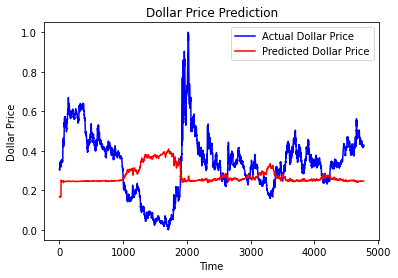

In [63]:
plt.plot(testY, color = 'blue', label = 'Actual Dollar Price')
plt.plot(predicted_price, color = 'red', label = 'Predicted Dollar Price')
plt.title('Dollar Price Prediction')
plt.xlabel('Time')
plt.ylabel('Dollar Price')
plt.legend()
plt.show()

In [133]:
def add(x, y=1):
    return print(x + y)

In [137]:
x = 50
add(x)

51
